In [1]:
pip install "numpy<2.0"

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import importlib
#from paths_creating_and_images_copying import * ## once you have previous script downloaded, no path are needed below
import numpy as np
from datetime import datetime
import json
import tensorflow.keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import Model
from tensorflow.keras import optimizers
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import callbacks
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import random
import cv2 as cv

In [3]:
## paths

model_dir = r'C:\Akshada\sem 5\Software Engineering\archive (1)\DisasterModel'

cyclone_dir = r'C:\Akshada\sem 5\Software Engineering\archive (1)\DisasterModel\Cyclone_Wildfire_Flood_Earthquake_Dataset\Cyclone'
earthquake_dir = r'C:\Akshada\sem 5\Software Engineering\archive (1)\DisasterModel\Cyclone_Wildfire_Flood_Earthquake_Dataset\Earthquake'
flood_dir = r'C:\Akshada\sem 5\Software Engineering\archive (1)\DisasterModel\Cyclone_Wildfire_Flood_Earthquake_Dataset\Flood'
wildfire_dir = r'C:\Akshada\sem 5\Software Engineering\archive (1)\DisasterModel\Cyclone_Wildfire_Flood_Earthquake_Dataset\Wildfire'

train_dir = os.path.join(model_dir, 'train')
validation_dir = os.path.join(model_dir, 'validation')
test_dir = os.path.join(model_dir, 'test')

train_dir_c = os.path.join(train_dir, 'cyclone')
train_dir_e = os.path.join(train_dir, 'earthquake')
train_dir_f = os.path.join(train_dir, 'flood')
train_dir_w = os.path.join(train_dir, 'wildfire')

validation_dir_c = os.path.join(validation_dir, 'cyclone')
validation_dir_e = os.path.join(validation_dir, 'earthquake')
validation_dir_f = os.path.join(validation_dir, 'flood')
validation_dir_w = os.path.join(validation_dir, 'wildfire')

test_dir_c = os.path.join(test_dir, 'cyclone')
test_dir_e = os.path.join(test_dir, 'earthquake')
test_dir_f = os.path.join(test_dir, 'flood')
test_dir_w = os.path.join(test_dir, 'wildfire')

print('Check if samples are of same size:\n\nTrain:')
print(len(os.listdir(train_dir_c)), len(os.listdir(train_dir_e)), len(os.listdir(train_dir_f)), len(os.listdir(train_dir_w)))
print('Validation:')
print(len(os.listdir(validation_dir_c)), len(os.listdir(validation_dir_e)), len(os.listdir(validation_dir_f)), len(os.listdir(validation_dir_w)))
print('Test:')
print(len(os.listdir(test_dir_c)), len(os.listdir(test_dir_e)), len(os.listdir(test_dir_f)), len(os.listdir(test_dir_w)))

Check if samples are of same size:

Train:
400 400 400 400
Validation:
100 100 100 100
Test:
100 100 100 100


**Create and train, or upload a model.** 

In [4]:
# model = None

# model_path = r'Z:\archive (1)\best_model.h5'
# model_history_path = r'Z:\archive (1)\history'

# model_exists = os.path.exists(model_path)
# history_exists = os.path.exists(model_history_path)

# if model_exists:
#     model = load_model(model_path)

# else:
#     model = models.Sequential()
#     model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape= (180, 180, 3)))
#     model.add(layers.MaxPooling2D((2, 2)))
#     model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
#     model.add(layers.MaxPooling2D((2, 2)))
#     model.add(layers.Conv2D(128, (3, 3), activation= 'relu'))
#     model.add(layers.MaxPooling2D((2, 2)))
#     model.add(layers.Conv2D(128, (3, 3), activation= 'relu'))
#     model.add(layers.MaxPooling2D((2, 2)))
#     model.add(layers.Conv2D(256, (3, 3), activation = 'relu'))
#     model.add(layers.MaxPooling2D((2, 2)))
#     model.add(layers.Flatten())
#     model.add(layers.Dropout(0.3))
#     model.add(layers.Dense(512, activation = 'relu'))
#     model.add(layers.Dense(4, activation = 'softmax'))

# #keras.backend.clear_session()
# model.summary()

# if not model_exists:
#     model.compile(optimizer=optimizers.RMSprop(lr=1e-4), loss='categorical_crossentropy', metrics=['acc'])


# train_datagen = ImageDataGenerator(rescale= 1./255,
#                                     rotation_range= 40,
#                                     width_shift_range= .2,
#                                     height_shift_range= .2,
#                                     shear_range= .2,
#                                     zoom_range= .2,
#                                     horizontal_flip= True)

# test_datagen = ImageDataGenerator(rescale= 1./255)

# train_generator = train_datagen.flow_from_directory(train_dir,
#                                                     target_size= (180, 180),
#                                                     batch_size=32,
#                                                     class_mode='categorical')

# validation_generator = test_datagen.flow_from_directory(validation_dir,
#                                                     target_size=(180, 180),
#                                                     batch_size=32,
#                                                     class_mode='categorical')

# print('\n\nCheck a size of data/label batches:')
# for data_batch, label_batch in train_generator:
#     print('data batch size:', data_batch.shape)
#     print('label batch size:', label_batch.shape)
#     break

# # logdir = "C:\\Users\\Mikołaj\\Desktop\\python\\MachineLearning\\KERAS\\DisasterModel\\Logs" + datetime.now().strftime("%Y%m%d-%H%M%S")
# # tensorboard_callback = keras.callbacks.TensorBoard(log_dir = logdir, histogram_freq=0, write_graph=True, write_images=True)

# es = EarlyStopping(monitor='val_acc', mode='max', verbose=1, patience=6)
# mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [5]:
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 1. Build the Model
model = models.Sequential()

# FIX: Use explicit Input layer to avoid Keras 3 warnings
model.add(layers.Input(shape=(180, 180, 3))) 

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.3))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

model.summary()

# 2. Compile (ALWAYS required for a new model)
# FIX: changed 'lr' to 'learning_rate'
model.compile(optimizer=optimizers.RMSprop(learning_rate=1e-4), 
              loss='categorical_crossentropy', 
              metrics=['accuracy']) # 'acc' is okay, but 'accuracy' is standard

# 3. Data Generators
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=.2,
                                   height_shift_range=.2,
                                   shear_range=.2,
                                   zoom_range=.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(180, 180),
                                                    batch_size=32,
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(180, 180),
                                                        batch_size=32,
                                                        class_mode='categorical')

# 4. Callbacks
# FIX: Changed 'val_acc' to 'val_accuracy' so these actually work
es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=6)
mc = ModelCheckpoint('best_model.keras', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
# Note: Changed .h5 to .keras which is the new standard, but .h5 works too.

print("Setup Complete. Ready to train.")

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 18, 18, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 9, 9, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 7, 7, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,718,212 (6.55 MB)

 Trainable params: 1,718,212 (6.55 MB)

 Non-trainable params: 0 (0.00 B)

Found 1600 images belonging to 4 classes.
Found 400 images belonging to 4 classes.
Setup Complete. Ready to train.


In case once model is created and its parameters are contained in the history file, we can restore them quickly. If it's empty, model will fit generators and save history file to use it later.

In [8]:
import tensorflow as tf
from tensorflow.keras import backend as K

# 1. Define Custom F1 Score Metric
def f1_score(y_true, y_pred):
    # Calculate Precision and Recall first
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    
    # Calculate F1: 2 * (P * R) / (P + R)
    return 2 * ((precision * recall) / (precision + recall + K.epsilon()))

# 2. Compile with all Metrics
model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=[
        'accuracy', 
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall'),
        f1_score  # <--- We add our custom function here
    ]
)

# 3. Train (same as before)
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator), 
    epochs=100,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    callbacks=[es, mc] 
)

Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8639 - f1_score: 0.8652 - loss: 0.3757 - precision: 0.8884 - recall: 0.8442
Epoch 1: val_accuracy did not improve from 0.90250
50/50 ━━━━━━━━━━━━━━━━━━━━ 163s 3s/step - accuracy: 0.8800 - f1_score: 0.8793 - loss: 0.3302 - precision: 0.9010 - recall: 0.8594 - val_accuracy: 0.8575 - val_f1_score: 0.8639 - val_loss: 0.3837 - val_precision: 0.8954 - val_recall: 0.8350
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8884 - f1_score: 0.8873 - loss: 0.3044 - precision: 0.9069 - recall: 0.8693
Epoch 2: val_accuracy did not improve from 0.90250
50/50 ━━━━━━━━━━━━━━━━━━━━ 153s 3s/step - accuracy: 0.8881 - f1_score: 0.8882 - loss: 0.3046 - precision: 0.9064 - recall: 0.8712 - val_accuracy: 0.8850 - val_f1_score: 0.8803 - val_loss: 0.3021 - val_precision: 0.9053 - val_recall: 0.8600
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8942 - f1_score: 0.8962 - loss: 0.2959 - precision: 0.9093 - recall: 0.883

Once the model is trained, we can evaluate and test it. In the below we take 400 images from the test directory, evaluate the model and list accuracy score and loss value, also there is a function which plots 9 images, named by model's predictions.

In [9]:
import numpy as np
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

# 1. Setup Path
# Using the path you provided recently
model_dir = r'C:\Akshada\sem 5\Software Engineering\archive (1)\DisasterModel'
test_dir = os.path.join(model_dir, 'test')

# 2. Prepare Test Data
# shuffle=False is CRITICAL here to match predictions to the right labels
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(180, 180), # Ensure this matches your training input size!
    batch_size=1,
    class_mode='categorical',
    shuffle=False 
)

# 3. Generate Predictions
print("Generating predictions...")
# verbose=1 shows the progress bar
Y_pred = model.predict(test_generator, verbose=1) 
y_pred = np.argmax(Y_pred, axis=1) # Convert probabilities to class numbers (0, 1, 2, 3)

# 4. Get True Labels
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys()) 

# 5. Print Detailed Report (Precision, Recall, F1, Accuracy)
print("\n" + "="*50)
print("CLASSIFICATION REPORT")
print("="*50)
print(classification_report(y_true, y_pred, target_names=class_labels))

# 6. Print Overall Accuracy manually for confirmation
accuracy = np.sum(y_pred == y_true) / len(y_true)
print(f"Overall Accuracy: {accuracy * 100:.2f}%")

Found 400 images belonging to 4 classes.
Generating predictions...
400/400 ━━━━━━━━━━━━━━━━━━━━ 24s 58ms/step

CLASSIFICATION REPORT
              precision    recall  f1-score   support

     cyclone       0.96      0.81      0.88       100
  earthquake       0.78      0.88      0.83       100
       flood       0.79      0.73      0.76       100
    wildfire       0.83      0.92      0.87       100

    accuracy                           0.83       400
   macro avg       0.84      0.83      0.83       400
weighted avg       0.84      0.83      0.83       400

Overall Accuracy: 83.50%


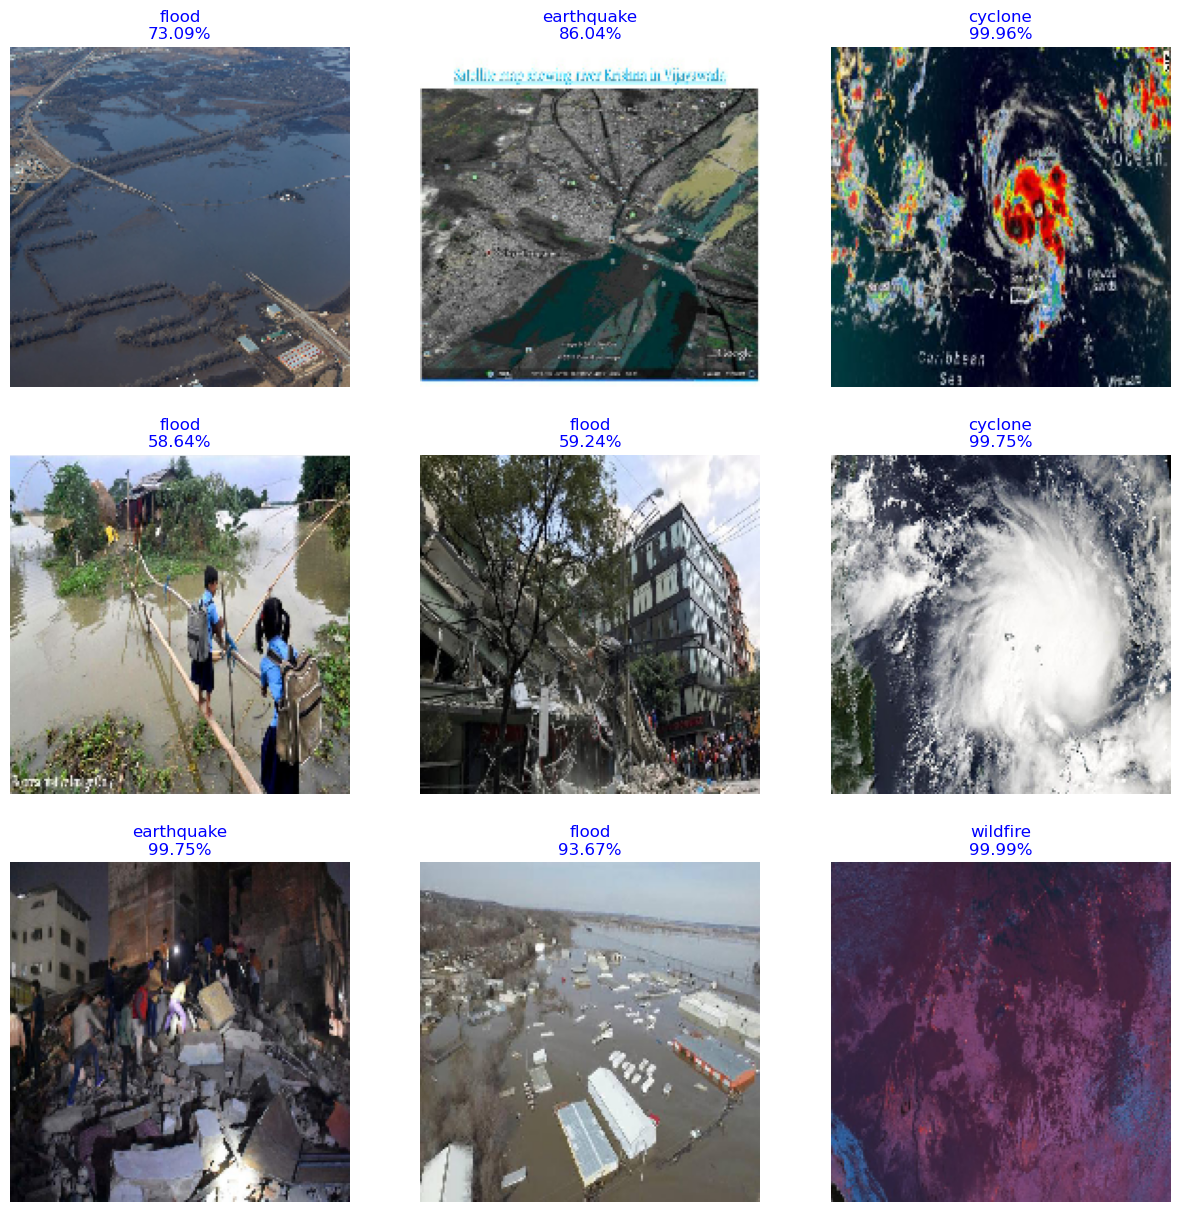

In [10]:
import matplotlib.pyplot as plt
import random

def run_prediction():
    # Get label names dynamically (e.g., {0: 'Cyclone', 1: 'Earthquake'...})
    labels = {v: k for k, v in test_generator.class_indices.items()}
    
    plt.figure(figsize=(15, 15))
    
    # We will show 9 random images
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        
        # Pick a random index
        idx = random.randint(0, len(test_generator) - 1)
        
        # Get the image and its true label
        # test_generator[idx] returns (batch_x, batch_y)
        img_batch, label_batch = test_generator[idx]
        img = img_batch[0]
        
        # Predict
        prediction = model.predict(np.expand_dims(img, axis=0), verbose=0)
        
        # Get highest probability
        predicted_index = np.argmax(prediction)
        confidence = np.max(prediction) * 100
        predicted_name = labels[predicted_index]
        
        # Display
        plt.imshow(img)
        plt.axis('off') # Removes the x/y axis numbers
        
        # Title: "Cyclone (99.5%)"
        # If you want to see the True label too, use this title format:
        # title = f"Pred: {predicted_name} ({confidence:.1f}%)\nTrue: {labels[np.argmax(label_batch)]}"
        
        plt.title(f"{predicted_name}\n{confidence:.2f}%", fontsize=12, color='blue')

# Run the function
run_prediction()

Sometime it might be useful to have a look, what's going on inside our model. For convolutional neural networks we can take a look on particular layers (for example to see what patterns are recognized in each one). In the below, we take a random image, plot it with predicted name, then present what the model sees during 'recognition' on particular level.

In [11]:
model_history_path = r'C:\Akshada\sem 5\Software Engineering\archive (1)\history1.json' 

try:
    # Ensure the directory exists before trying to save
    # This prevents "FileNotFoundError" if the folder isn't there yet
    os.makedirs(os.path.dirname(model_history_path), exist_ok=True)
    
    with open(model_history_path, 'w') as json_file:
        json.dump(history.history, json_file)
    print(f"✅ History saved successfully to: {model_history_path}")

except Exception as e:
    print(f"❌ Could not save history: {e}")

✅ History saved successfully to: C:\Akshada\sem 5\Software Engineering\archive (1)\history1.json
